In [43]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import datetime
from prophet import Prophet

40000

In [53]:
df = pd.read_csv("./data/revised_dataset.csv", sep=";")

df = df[["Latence1"]]
df.shape[0]

listDates = []
for i in range(1,df.shape[0]+1):
    sec = 3*i
    min = sec // 60
    heure = min // 60
    jour = heure // 24
    mois = jour // 30
    listDates.append(datetime.datetime(2000,1+mois%12,1+jour%31,heure%24,min%60,sec%60))
    
data = np.array(listDates)
df["dates"] = pd.Series(data)

In [54]:
# Preprocessing data for prophet use
df = df.rename(columns={"Latence1": "y", "dates": "ds"})
df

,y,ds
0,0.485147,2000-01-01 00:00:03
1,0.157996,2000-01-01 00:00:06
2,0.446919,2000-01-01 00:00:09
3,0.186139,2000-01-01 00:00:12
4,0.063124,2000-01-01 00:00:15
...,...,...
39995,0.498866,2000-01-02 09:19:48
39996,0.185063,2000-01-02 09:19:51
39997,0.139821,2000-01-02 09:19:54
39998,0.083778,2000-01-02 09:19:57


In [55]:
m = Prophet(changepoint_prior_scale=0.01).fit(df)

23:45:51 - cmdstanpy - INFO - Chain [1] start processing
23:45:54 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
future = m.make_future_dataframe(periods=25, freq = '3s')
future.tail()

,ds
40020,2000-01-02 09:21:03
40021,2000-01-02 09:21:06
40022,2000-01-02 09:21:09
40023,2000-01-02 09:21:12
40024,2000-01-02 09:21:15


In [70]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
40020,2000-01-02 09:21:03,0.321840,0.132360,0.510939
40021,2000-01-02 09:21:06,0.321840,0.131485,0.515258
40022,2000-01-02 09:21:09,0.321840,0.127972,0.509989
40023,2000-01-02 09:21:12,0.321839,0.114185,0.507098
40024,2000-01-02 09:21:15,0.321839,0.130978,0.515326


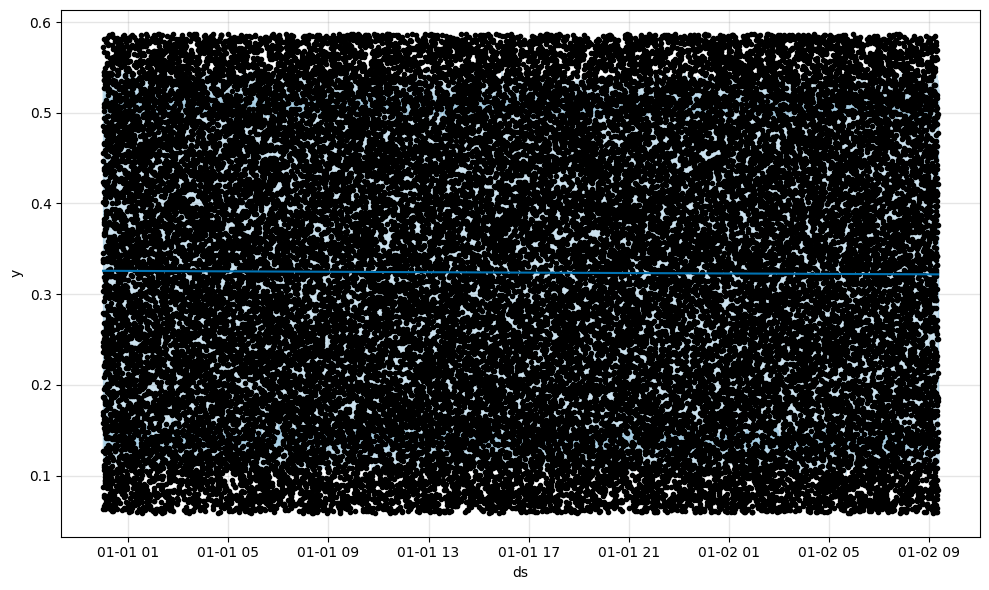

In [71]:
fig1 = m.plot(forecast)

pandas.core.frame.DataFrame

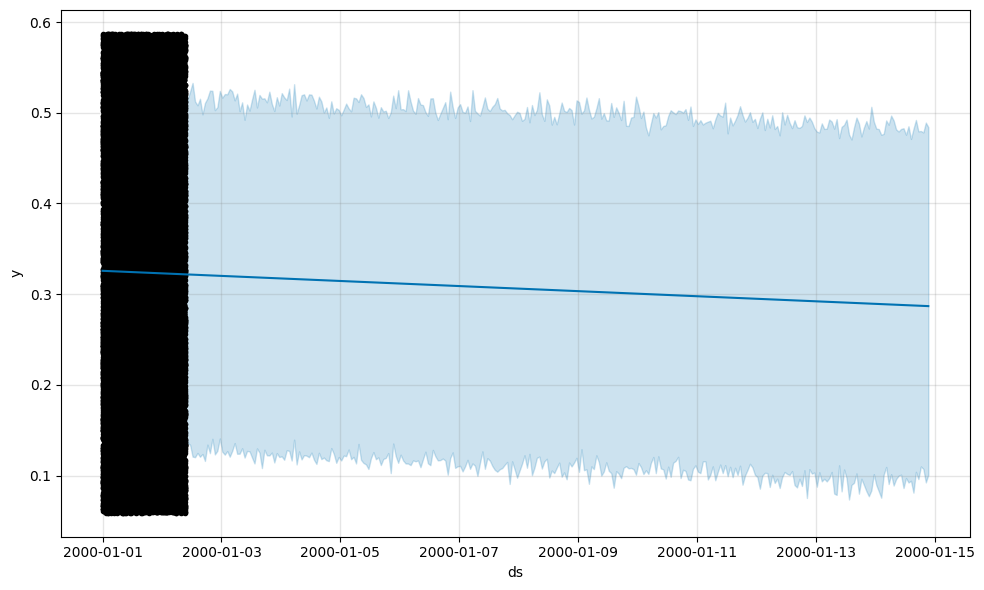

In [58]:
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)
type(fcst)

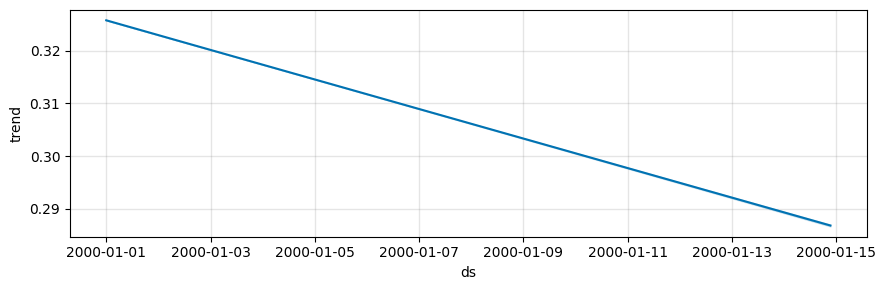

In [57]:
fig = m.plot_components(fcst)

In [59]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01 00:00:03,0.325744,0.124980,0.522241,0.325744,0.325744,0.0,0.0,0.0,0.0,0.0,0.0,0.325744
1,2000-01-01 00:00:06,0.325744,0.113902,0.530012,0.325744,0.325744,0.0,0.0,0.0,0.0,0.0,0.0,0.325744
2,2000-01-01 00:00:09,0.325744,0.136503,0.516954,0.325744,0.325744,0.0,0.0,0.0,0.0,0.0,0.0,0.325744
3,2000-01-01 00:00:12,0.325744,0.145015,0.532805,0.325744,0.325744,0.0,0.0,0.0,0.0,0.0,0.0,0.325744
4,2000-01-01 00:00:15,0.325744,0.136841,0.518566,0.325744,0.325744,0.0,0.0,0.0,0.0,0.0,0.0,0.325744
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40295,2000-01-14 17:20:00,0.287290,0.096077,0.479524,0.287122,0.287438,0.0,0.0,0.0,0.0,0.0,0.0,0.287290
40296,2000-01-14 18:20:00,0.287173,0.110023,0.479917,0.287004,0.287323,0.0,0.0,0.0,0.0,0.0,0.0,0.287173
40297,2000-01-14 19:20:00,0.287057,0.107270,0.478311,0.286885,0.287207,0.0,0.0,0.0,0.0,0.0,0.0,0.287057
40298,2000-01-14 20:20:00,0.286940,0.092422,0.489184,0.286768,0.287091,0.0,0.0,0.0,0.0,0.0,0.0,0.286940
